In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('Iris.csv')

In [32]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
df["Species"]=df["Species"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [21]:
## Features into independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [59]:
df=df[df["Species"]!='Iris-virginica']

In [54]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,1
96,97,5.7,2.9,4.2,1.3,1
97,98,6.2,2.9,4.3,1.3,1
98,99,5.1,2.5,3.0,1.1,1


In [60]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [36]:
df["Species"]=df["Species"].map({"Iris-setosa":0,"Iris-versicolor":1})

In [37]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [38]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2
96,97,5.7,2.9,4.2,1.3
97,98,6.2,2.9,4.3,1.3
98,99,5.1,2.5,3.0,1.1


In [39]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Species, Length: 100, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

In [43]:
from sklearn.model_selection import GridSearchCV

parameter={'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X,y)

c:\Users\BISWAJIT DAS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
110 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BISWAJIT DAS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BISWAJIT DAS\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\BISWAJIT DAS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", li

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [42]:
from sklearn.model_selection import GridSearchCV 

parameters = {'C' :[0.5,1,2,3,5,6,7,9,10,30,45], 'penalty' :['l1','l2', 'elasticnet']}
log_regressor=GridSearchCV(regression,parameters,scoring='accuracy',cv=5)

log_regressor.fit(X,y)


c:\Users\BISWAJIT DAS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
110 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\BISWAJIT DAS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\BISWAJIT DAS\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\BISWAJIT DAS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", li

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [44]:
print(log_regressor.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [45]:
print(log_regressor.best_score_)

0.9099999999999999


In [47]:
prediction_log=log_regressor.predict(X_test)

In [52]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.572341,-0.619103,0.826348,0.821018,0.866069
SepalLengthCm,0.572341,1.000000,-0.197646,0.812389,0.789613,0.728290
SepalWidthCm,-0.619103,-0.197646,1.000000,-0.595761,-0.560120,-0.684019
PetalLengthCm,0.826348,0.812389,-0.595761,1.000000,0.978856,0.969955
PetalWidthCm,0.821018,0.789613,-0.560120,0.978856,1.000000,0.960158
Species,0.866069,0.728290,-0.684019,0.969955,0.960158,1.000000


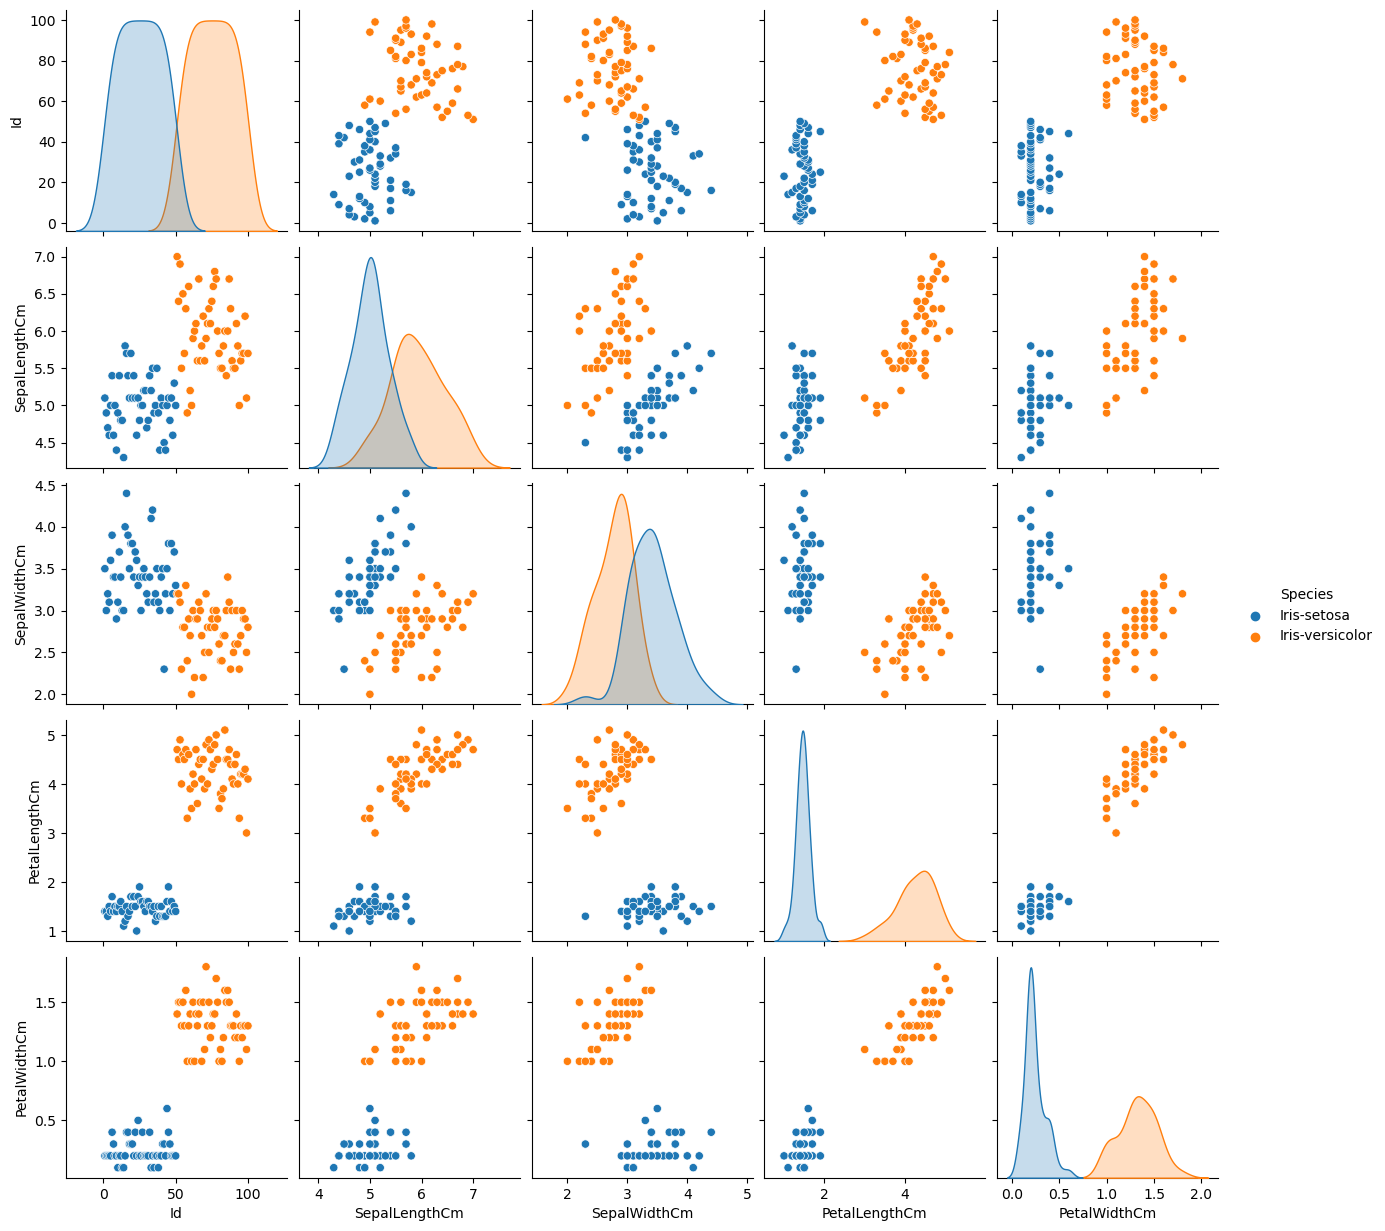

In [61]:
sns.pairplot(df,hue="Species")

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [63]:
confusion_matrix(y_test,prediction_log)

array([[12,  0],
       [ 0,  8]], dtype=int64)

In [64]:
f1_score(y_test,prediction_log)

1.0

In [67]:
df=pd.read_csv('Iris.csv')

In [69]:
df=df[df["Species"]!='Iris-setosa']

In [70]:
df["Species"].unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [71]:
df["Species"]=df["Species"].map({"Iris-versicolor":0,"Iris-virginica" :1})

In [72]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [73]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,51,7.0,3.2,4.7,1.4
51,52,6.4,3.2,4.5,1.5
52,53,6.9,3.1,4.9,1.5
53,54,5.5,2.3,4.0,1.3
54,55,6.5,2.8,4.6,1.5
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [74]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 100, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

In [77]:
from sklearn.model_selection import GridSearchCV

parameter={'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X,y)

c:\Users\BISWAJIT DAS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\BISWAJIT DAS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [78]:
print(log_regressor.best_params_)

{'C': 7, 'penalty': 'l2'}


In [79]:
print(log_regressor.best_score_)

0.93


In [80]:
prediction_log=log_regressor.predict(X_test)

In [82]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.373000,0.279165,0.620325,0.703528,0.866069
SepalLengthCm,0.373000,1.000000,0.553855,0.828479,0.593709,0.494305
SepalWidthCm,0.279165,0.553855,1.000000,0.519802,0.566203,0.308080
PetalLengthCm,0.620325,0.828479,0.519802,1.000000,0.823348,0.786424
PetalWidthCm,0.703528,0.593709,0.566203,0.823348,1.000000,0.828129
Species,0.866069,0.494305,0.308080,0.786424,0.828129,1.000000


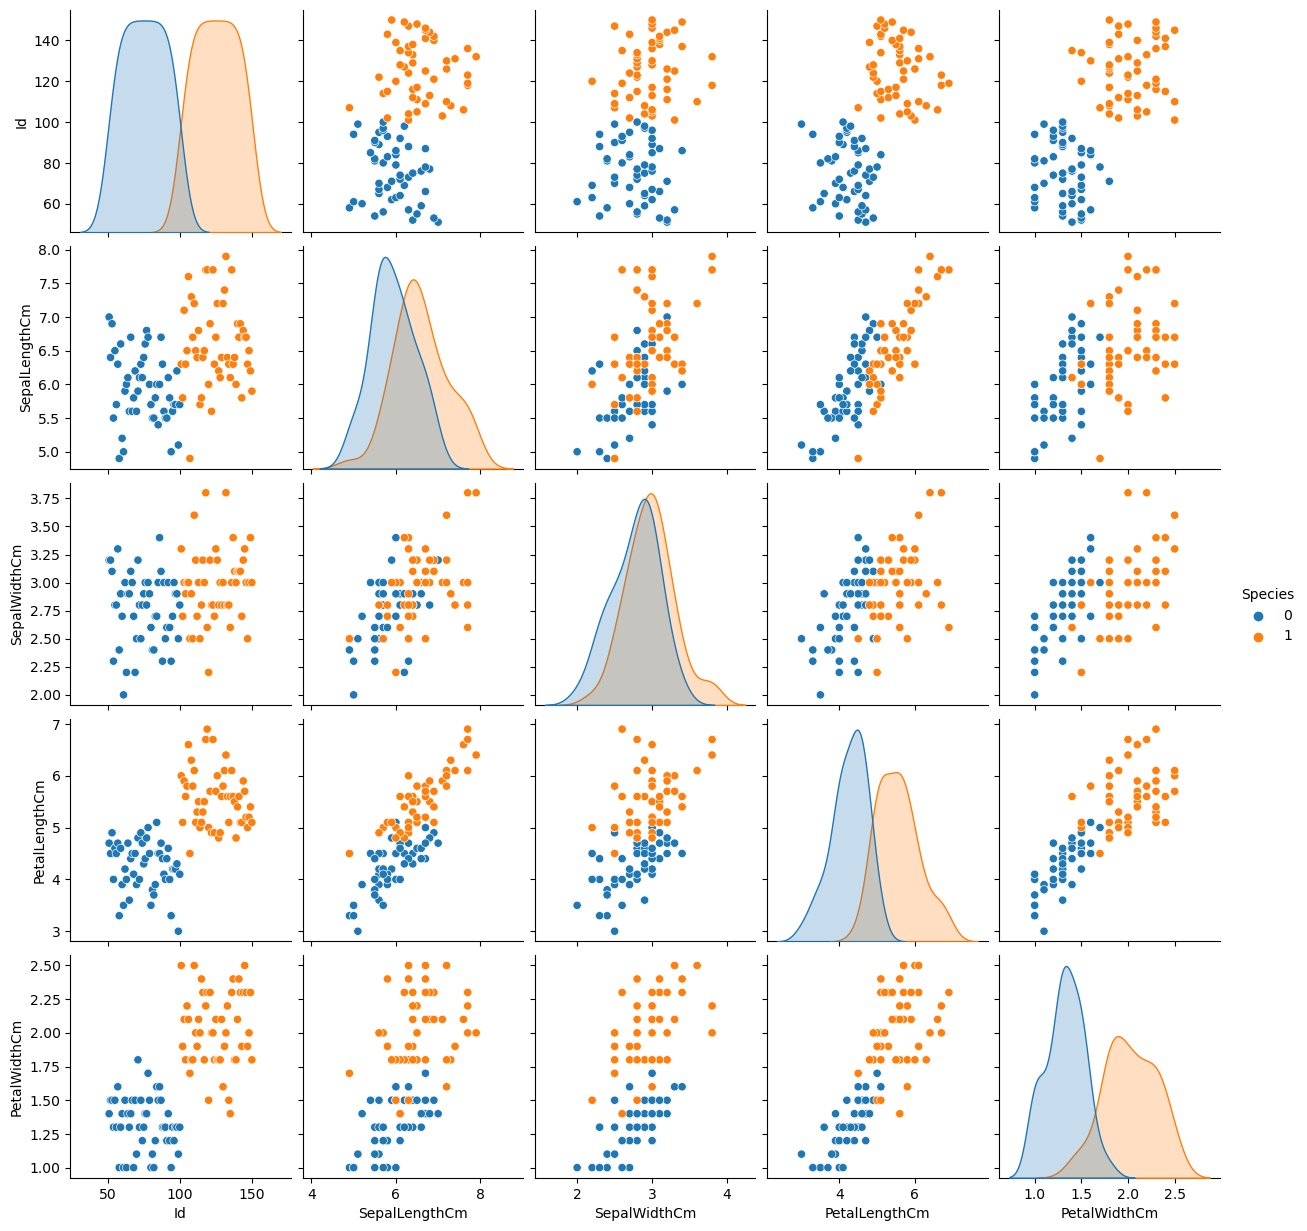

In [83]:
sns.pairplot(df,hue="Species")

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [90]:
print(accuracy_score(y_test,prediction_log))
print(confusion_matrix(y_test,prediction_log))
print(precision_recall_curve(y_test,prediction_log))
print(roc_auc_score(y_test,prediction_log))
print(f1_score(y_test,prediction_log))

1.0
[[12  0]
 [ 0  8]]
(array([0.4, 1. , 1. ]), array([1., 1., 0.]), array([0, 1], dtype=int64))
1.0
1.0
